In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.cluster import KMeans

In [2]:
df_original = pd.read_csv('aps_failure_training_set.csv', skiprows=20)
df_original.shape

(60000, 171)

In [3]:
df_original.replace('neg', 0, inplace = True)
df_original.replace('pos', 1, inplace = True)

In [4]:
df_no_target = df_original.drop(columns=['class'])
df_no_target.shape

(60000, 170)

In [5]:
df_original.replace({'na': np.nan}, inplace=True, regex=True)
df_no_target.replace({'na': np.nan}, inplace=True, regex=True)

In [6]:
def remove_10perc_nan_columns(dataframe):
    num_nan = dataframe.isnull().sum()
    num_nan = num_nan.values
    column_percent_nan = num_nan / dataframe.shape[0]
    
    column_labels = dataframe.columns.values.tolist()
    new_df = dataframe
    for i in range(dataframe.shape[1]):
        if column_percent_nan[i] >= 0.1:
            x = new_df.pop(column_labels[i])

    return new_df

In [7]:
df_original = remove_10perc_nan_columns(df_original)
df_original.shape

(60000, 143)

In [8]:
df_no_target = remove_10perc_nan_columns(df_no_target)
df_no_target.shape

(60000, 142)

In [9]:
def replace_nan_median(df):
    imputer = Imputer(missing_values=np.nan, strategy='median', axis=0)
    for column in df:
        df[[column]] = imputer.fit_transform(df[[column]])

    return df

In [10]:
df_original = replace_nan_median(df_original)
df_no_target = replace_nan_median(df_no_target)

In [11]:
inertias = []
ks = range(1, 10)
for i in ks:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_no_target)
    inertias.append(kmeans.inertia_)

Text(0,0.5,'Inércia')

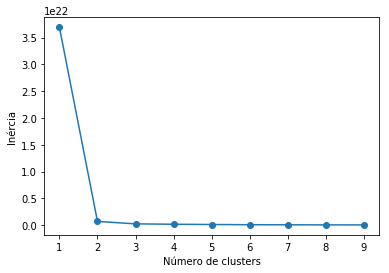

In [12]:
plt.plot(ks, inertias, '-o')
plt.xlabel('Número de clusters')
plt.ylabel('Inércia')

In [16]:
df_original['class'].replace(0.0, 'neg', inplace = True)
df_original['class'].replace(1.0, 'pos', inplace = True)

In [17]:
kmeans = KMeans(n_clusters=2)
labels = kmeans.fit_predict(df_no_target)

cluster_class = pd.DataFrame({'cluster': labels, 'class': df_original['class']})
ct = pd.crosstab(cluster_class['cluster'], cluster_class['class'])
ct

class,neg,pos
cluster,,
0,49547,985
1,9453,15
